In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from bokeh.plotting import figure, show, output_notebook

Get the data from the feature file.

In [2]:
feats = pd.read_csv("../System/sanity_train.csv")
feats.head(3)

,superlatives,degree_adverbs,comparative_adverbs,proper_nouns,dates,numbers,fp_pronouns,negations,pos_emotion,neg_emotion,...,ap_num,ap_date,ap_title,alliteration,profanity,lexical_diversity,lexical_density,function_words,spelling_errors,class
0,0.002488,0.200000,0.133333,0.224000,0.000000,0.012438,0.230769,0.000000,0.009950,0.014925,...,0.0,1.0,1.0,0.000000,0.000000,0.613692,0.589242,0.410758,0.034230,1
1,0.000000,0.047619,0.047619,0.170940,0.000000,0.000000,0.545455,0.010471,0.002618,0.005236,...,0.0,1.0,1.0,0.166667,0.002577,0.590206,0.597938,0.402062,0.030928,1
2,0.004255,0.111111,0.000000,0.163934,0.017021,0.008511,0.125000,0.017021,0.017021,0.004255,...,0.0,1.0,1.0,0.000000,0.000000,0.566667,0.575000,0.425000,0.020833,1


Scale the features

In [3]:
features = feats.columns[:-1]

x = feats.loc[:, features].values
y = feats.loc[:, ['class']].values

x = StandardScaler().fit_transform(x)

Project to 2D with Principal Component Analysis (PCA)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])

In [5]:
pca_df = pd.concat([principalDf, feats[['class']]], axis=1)
pca_df.head(3)

,principal component 1,principal component 2,class
0,-0.163171,1.490985,1
1,-0.927415,1.493227,1
2,-1.147298,-1.118545,1


Visualise the 2D Projection.

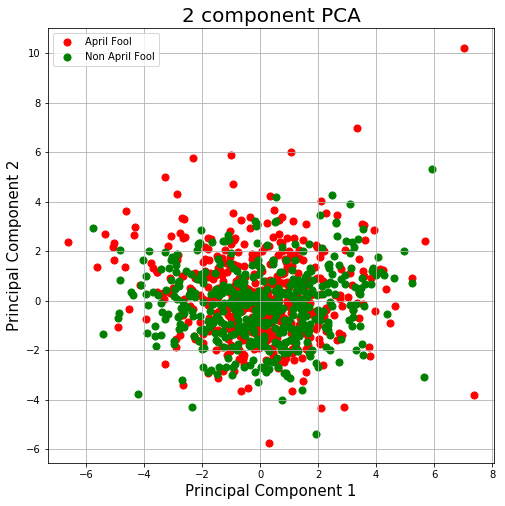

In [6]:
def plot_pca_2(pca_df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    targets = {1:'April Fool', 0:'Non April Fool'}
    colours = ['r', 'g']

    for target, colour in zip(targets.keys(), colours):
        indicesToKeep = pca_df['class'] == target
        ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
                   , pca_df.loc[indicesToKeep, 'principal component 2']
                   , c = colour
                   , s = 50)
    ax.legend(list(targets.values()))
    ax.grid()

    plt.show()
    
plot_pca_2(pca_df)

In [7]:
pca_df.head()

,principal component 1,principal component 2,class
0,-0.163171,1.490985,1
1,-0.927415,1.493227,1
2,-1.147298,-1.118545,1
3,3.100722,1.109849,1
4,2.260789,-0.371081,1


In [8]:
def bokeh_plot_pca(pca_df):
    pca_af = pca_df.loc[pca_df["class"] == 1]
    pca_naf = pca_df.loc[pca_df["class"] == 0]
    output_notebook()
    p = figure()

    p.scatter(x=pca_af['principal component 1'], y=pca_af['principal component 2'], marker="circle",
                line_color="white", fill_color="red", fill_alpha=0.5, size=6)

    p.scatter(x=pca_naf['principal component 1'], y=pca_naf['principal component 2'], marker="square",
                line_color="white", fill_color="blue", fill_alpha=0.5, size=6)
    show(p)
    
bokeh_plot_pca(pca_df)

Loading BokehJS ...

In [9]:
pca.explained_variance_ratio_

# These two components only hold ~16% of the information

array([0.09445059, 0.06562831])

See how many components we need to maintain 95% of the information

In [10]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

number_components = principalComponents.shape[1]

print("We need {0} components to maintain 95% information".format(number_components))

We need 35 components to maintain 95% information


Now let's look at some specific feature categories to see which split the data best.

First we get the feature names for each set

In [11]:
feature_sets = dict()
directory = "../System/feature_sets"
for filename in os.listdir(directory):
    feature_set = filename.split(".txt")[0]
    feature_sets[feature_set] = []
    with open(directory + "/" + filename) as file:
        for line in file:
            if(line.strip() in feats.columns):
                feature_sets[feature_set].append(line.strip())

Now we can do PCA for each group

In [12]:
fs = feature_sets['vagueness']

x = feats.loc[:, fs].values
y = feats.loc[:, ['class']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])

pca_df = pd.concat([principalDf, feats[['class']]], axis=1)

print(pca.explained_variance_ratio_)

bokeh_plot_pca(pca_df)

[0.24163648 0.15459379]


Loading BokehJS ...